In [ ]:
! pip install pymc3 --upgrade

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate 
from scipy.special import comb
import scipy
import pymc3 as pm
from math import gamma, pow
import arviz as az

In [ ]:
pm.__version__

'3.7'

#### Bayesian Statistics - From Concept to Data Analysis (Coursera)
Week 1 - Honors

In [ ]:
# if X ~ exp(3) then P(x>1/3) = ?
# If X \sim \text{Exp}(3)X∼Exp(3), what is the value of P(X>1/3)P(X>1/3)? Round your answer to two decimal places.
1 - stats.expon.cdf(x=1/3, scale=1/3)

0.36787944117144233

Suppose X ~ Uniform(0,2) and Y ~ Uniform (8,10) 
What is the value of E(4X + Y)?


In [ ]:
# uniform over interval [loc, loc+scale]
4*stats.uniform.expect(loc=0, scale=2) + stats.uniform.expect(loc=8, scale=2)

13.0

Suppose $X∼N(1,5^2)$ and $ Y \sim N(-2, 3^2) $ and that X and Y are independent. We have $ Z = X + Y \sim N(\mu, \sigma^2) $ because the sum of normal random variables also follows a normal distribution.

What is the value of $\mu?$

$\mu = 1 + (-2) = -1$

What is the value of $\sigma^2 $ ?

Hint: If two random variables are independent, the variance of their sum is the sum of their variances.

$ \sigma^2 = 5^2 + 3^2 $

In [ ]:
5**2 + 9

34

Consider again X ~ $N(1, 5^2)$  and Y ~ $N(-2, 3^2)$  but this time X and Y are not independent. Then Z = X+Y is still normally distributed with the same mean found in Question 4. What is the variance of Z if E(XY) = -5?

Var(X+Y)=Var(X)+Var(Y)+2Cov(X,Y)

Cov(X,Y) = E(XY) − E(X)E(Y)

In [ ]:
34 + 2*(-5 -(1)*(-2))

28

Using the central limit theorem as an approximation, and following the example of Lesson 4.1, construct a 95% confidence interval for p, the probability of obtaining heads.

Report the lower end of this interval and round your answer to two decimal places.

In [ ]:
theta = 0.47
n = 100
mu = theta
sem = np.sqrt(theta*(1-theta)/n)

# 95% Confidence interval
mu - 1.96*sem, mu + 1.96*sem

(0.37217655904641256, 0.5678234409535874)

Recall from Lesson 4.4 that $ if X_1,\ldots,X_n \overset{\text{iid}}{\sim} $ $\text {Exponential}(\lambda) $ (iid means independent and identically distributed), then the MLE for $ \lambda $ is $1/\bar{x} $ where $\bar{x} $
is the sample mean. Suppose we observe the following data: $ X_1 = 2.0, X_2=2.5 , X_3=4.1,\ X_4=1.8,\ X_5=4.0 $

Calculate the MLE for $ \lambda $. Round your answer to two decimal places.

In [ ]:
mu = (2 + 2.5 + 4.1 + 1.8 + 4)/5

lambda_ = 1/mu
lambda_

0.3472222222222222

In [ ]:
mu_normal = -(1.2) + 0.5 + 0.8 - (0.3)
mle_x = mu_normal/4
mle_x

-0.049999999999999975

We can define the likelihood by either treating this as Bernoulli distribution (each y is a Bernoulli outcome $ \in \{0,1\} $ with 400 samples or a Binomial dustribution with 1 sample of size 400 - 400 here corresponding to 400 Bernoulli events.

**Case 1 -**

With Bernoulli distribution the likelihood can be defined as - 

n = 400      (No. of samples) 
p - probability of a patient dying i.e mortality rate

$ y \in \{0,1\} $   ( A patient either died (1) or survived)

$ F_1 = f(y|\theta) = \prod_{i=1}^n p^{y_i} (1-p)^{1-y_i}$


**Case 2 -**  

Wih Binomial distribution, the likelihood can be defined as -

n - 400  (Total No. of Bernoulli trials)

p - probability of a patient dying i.e mortality rate

y - No. of successses in Bernoulli trials  i.e of patients who died out of n trials

$ F_2 = f(y|\theta) = {n \choose y} p^y (1-p)^{n-y}$

Note that F1 and F2 will have the same value, so we can solve this either by Binomial likelihood or a Bernoulli likelihood.



In [ ]:
# Plotting likelihood for hospital example with second approach - Treating this as Binomial distribution 

def likelihood(theta, y, N):
  # Binomial distribution with N = 500
  # y = No. of successes
  return (theta**y)*((1-theta)**(N-y))

In [ ]:
theta = np.arange(0.01, 0.99, step=0.01)
likelihoods = np.apply_along_axis(likelihood, axis=1,arr=theta.reshape(-1,1),y=72.0, N=500)

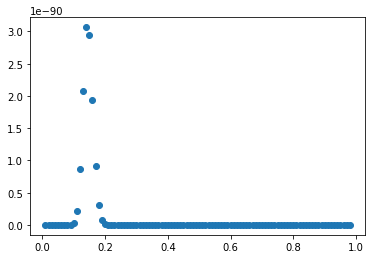

In [ ]:
plt.scatter(theta, likelihoods)
plt.show()

In [ ]:
# Theta with maximum value of likelihood
likelihoods.max(), theta[np.argmax(likelihoods)]

(3.06588387367417e-90, 0.14)

In [ ]:
def loglikelihood(theta, y, N):
  return y*np.log(theta) + (N-y)*np.log(1-theta)

In [ ]:
log_likelihoods = np.apply_along_axis(loglikelihood, axis=1,arr=theta.reshape(-1,1),y=72.0, N=500)

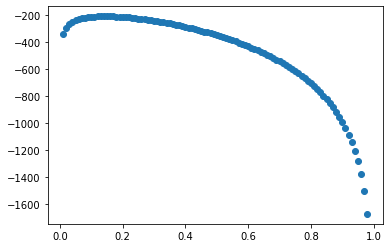

In [ ]:
plt.scatter(theta, log_likelihoods)
plt.show()

In [ ]:
log_likelihoods.max(), theta[np.argmax(log_likelihoods)]

(-206.11232246524577, 0.14)

In [ ]:
# 5% confidence interval for Standard normal distribution
stats.norm.interval(alpha=0.5, loc=0, scale=1)

(-0.6744897501960817, 0.6744897501960817)

In [ ]:
# Let X ∼ Pois(3). Find P(X = 1). Ans - 0.149
stats.poisson.pmf(mu=3, k=1)

0.14936120510359185

In [ ]:
# Let X ∼ Pois(3). Find P(X ≤ 1). Ans - (0.199)
stats.poisson.cdf(mu=3,k=1)

0.1991482734714558

In [ ]:
# Let X ∼ Pois(3). Find P(X > 1). Ans - (0.801)
1 - stats.poisson.cdf(mu=3, k=1)


0.8008517265285442

In [ ]:
# Let Y ∼ Gamma(2, 1/3). Find P(0.5 < Y < 1.5). Ans - (0.078)
# a = alpha                      (No. of events)
# scale = 1/beta                 (beta - Rate parameter)

stats.gamma.cdf(a=2, scale=3, x=1.5) - stats.gamma.cdf(a=2, scale=3, x=0.5)

0.07776602280343295

In [ ]:
# Let Z ∼ N(0, 1). Find z such that P(Z < z) = 0.975. (1.96)
# Using percent point function i.e inverse of CDF
stats.norm.ppf(loc=0, scale=1, q=0.975)

1.959963984540054

Suppose you collect measurements to perform inference about a population mean $ \theta$ . Your posterior distribution after observing data is $ \theta∣y∼N(0,1) $.

Report the upper end of a 95% equal-tailed interval for $ \theta $. Round your answer to two decimal places.

In [ ]:
stats.norm.interval(alpha=0.95, loc=0, scale=1)

(-1.959963984540054, 1.959963984540054)

### Week 2 quiz


In [ ]:
prior_cons = prior_lib = 0.5

In [ ]:
def likelihood(n,y,p):
  return comb(N=n,k=y) * (p ** y) * ((1-p) ** (n-y))

In [ ]:
# Given that the response was no for all questions, No. of yes = 0, so y = 0. 
# To find posterior prob of him being conservative, the prior = 0.5
# L(y=0|theta=conservative)*P(conservative) / (L(y0=|theta=conservative)*P(conservative) + L(y=0|theta=liberal))
n = 5
y = 0                   # all no
p_given_cons = 0.8                 # given conservative, probability of p is 0.8
p_given_liberal = 0.3              # given liberal, probability of yes = 1 - p(no) = 1- 0.7 = 0.3

posterior_prob_conservative = likelihood(n,y,p_given_cons)*prior_cons / (likelihood(n,y,p_given_cons)*prior_cons + likelihood(n,y,p_given_liberal)*prior_lib)
posterior_prob_conservative

0.0019003503771007767

In [ ]:
# Likelihood of observing all no given the person is liberal
likelihood(n,y,p_given_liberal)

0.16806999999999994

In [ ]:
# Likelihood of observing all no given the person is conservative
likelihood(n,y,p_cons)

0.00031999999999999965

The above likelihood makes sense since it is stated already that a conservative will say yes with p=0.8 i.e more likely to say yes than no. So, likelihood for a conservative person to say no is very less.

In [ ]:
# Given that the response was no for all questions, No. of yes = 0, so y = 0. 
# To find posterior prob of him being liberal, the prior = 0.5
n = 5
y = 0                   # all no

posterior_prob_liberal = likelihood(n,y,p_given_liberal)*prior_lib / (likelihood(n,y,p_given_liberal)*prior_lib + likelihood(n,y,p_given_cons)*prior_cons)
posterior_prob_liberal

0.9980996496228993

In [ ]:
p_fair = 0.4
p_loaded_heads = 0.3
p_loaded_tails = 0.3


In [ ]:
def coinLikelihood(n,y,p):
  return comb(N=n, k=y) * (p**y) * (1-p)**(n-y)

In [ ]:
# tossed 4 times  and obtained head twice. Posterior Probability of fair coin
# probability_fair = likelihood 2 heads given fair/ (likelihood 2 heads given fair + likelihood 2 heads given loaded heads + likelihood 2 heads given loaded tails)
n = 4
y = 2
p = 0.5                      # fair coin
prob_fair_coin = coinLikelihood(n, y, p)* p_fair/ (coinLikelihood(n, y, p)*p_fair + 
                                                   coinLikelihood(n, y, 0.7)*p_loaded_heads + 
                                                   coinLikelihood(n, y, 0.3)*p_loaded_tails)
prob_fair_coin

0.4858142246404975

In [ ]:
1 - prob_fair_coin

0.5141857753595025

In [ ]:
stats.beta.interval(alpha=0.95, a=8,b=16)

(0.16376359837494986, 0.5291916660085065)

Suppose we use a Bernoulli likelihood for each coin flip, i.e., $ f(y_i \mid \theta) = \theta^{y_i} (1-\theta)^{1-y_i} I_{\{ 0 \le \theta \le 1 \}} $
 =1, and a uniform prior for $\theta$.

Find the posterior probability that $\theta$ < 0.5 if we observe the sequence (T,T,T,T). Round your answer to two decimal places.

In [ ]:
# solving this as Binomial distribution with 4 Bernoulli trials with 0 heads
n = 4
y = 0

# Posterior probability distribution is Beta(1+0, 1+n-0) = Beta(1,5)
post_beta_dist = scipy.stats.beta(a=1, b=5)

# CDF theta < 0.5
post_beta_dist.cdf(x=0.5)

0.96875

### Chemical refinement

The engineer tells you that the process is considered promising and can proceed to another phase of testing if we are 90% sure that the failure rate is less than .35.

Calculate the posterior probability $ P(\theta < .35 \mid x)$. In your role as the statistician, would you say that this new chemical should pass?

In [ ]:
# Question 6 - 
n = 20
fails = 6
alpha = 2 + fails
beta = 2 + n -  fails
print(alpha, beta)
post_dist = scipy.stats.beta(a=alpha, b=beta)
post_dist.cdf(x=0.35)

8 16


0.5864310314450809

In [ ]:
# should not be allowed
n = 25
fails = 6
alpha = 2 + fails
beta = 2 + n - fails
print(alpha, beta)
post_dist = scipy.stats.beta(a=alpha, b=beta)
post_dist.cdf(x=0.35)

8 21


0.8179064455690616

### Lesson 8

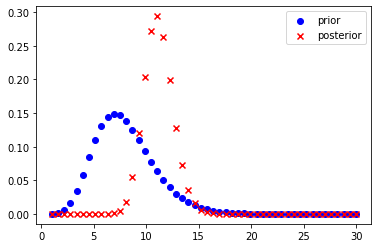

In [ ]:
x = np.linspace(1,30)
alpha_p = 8                  # shape parameter 
beta_p =  1                   # rate parameter
prior_dist = scipy.stats.gamma(a=alpha_p, scale=1/beta_p)
posterior_dist = scipy.stats.gamma(a=67, scale=1/6)

plt.scatter(x, prior_dist.pdf(x), marker='o', c='blue', label='prior')
plt.scatter(x, posterior_dist.pdf(x), marker='x', c='red', label='posterior')
plt.legend()
plt.show()


In [ ]:
# Posterior mean
posterior_dist.expect()

11.166666666666552

In [ ]:
posterior_dist.interval(alpha=0.90)

(9.021381966387125, 13.501302326315084)

In [ ]:
6/120

0.05

Now suppose the prior for $\theta $ is $\text{Beta}(2,2) $. What is the prior predictive probability that $y^*=1 $ for a new observation y*
 ? Round your answer to one decimal place.

In [ ]:
# Prior predictive probability 
y = 1
alpha = 2+y
beta = 2 + 1 -y
scipy.stats.beta(a=alpha, b=beta).expect()

0.6

In [ ]:
integrate.quad(lambda x: (x**2)*(1-x)**2, 0,1)[0]*6

0.2

In [ ]:
integrate.quad(lambda x: (x**6)*(1-x)**7, 0,1)[0] * math.factorial(13) /(math.factorial(4) * math.factorial(8))

0.26785714285714285

### Week 3 Honors quiz

In [ ]:
a = 2
b = 2
with pm.Model() as model:
  p = pm.Beta('p', alpha=a, beta=b)
  likelihood = pm.Bernoulli('likelihood',p=p)

  # Get samples from prior distribution
  prior = pm.sample_prior_predictive(samples=1000, model=model, random_seed=1)

In [ ]:
type(prior)

dict

In [ ]:
prior.keys()

dict_keys(['p', 'likelihood', 'p_logodds__'])

In [ ]:
# Get prior predictive probability of y=1, i.e probability of p from the generated samples by computing the mean of all probabilities of y=1
prior['p'].mean()

0.5085157957344193

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04b030b588>,
      dtype=object)

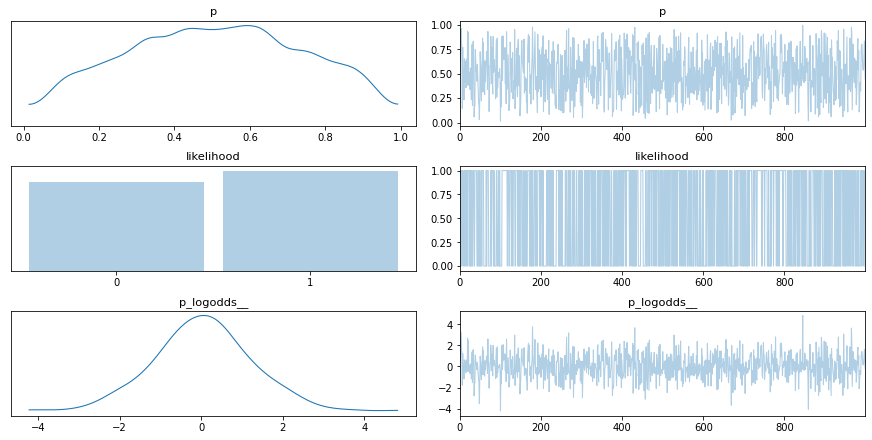

In [ ]:
# Prior probability distribution for p
pm.traceplot(prior)

After specifying our Beta(2,2) prior for $\theta$ , we observe 10 Bernoulli trials, 3 of which are successes.

What is the posterior predictive probability that y*=1 for the next (11th) observation y* ? Round your answer to two decimal places.

In [ ]:
with pm.Model() as model:
  p = pm.Beta('p',alpha=a, beta=b)
  likelihood = pm.Binomial('y', n=10, p=p, observed=3)
  trace = pm.sample(1000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.


In [ ]:
trace['p'].mean()

0.3586771991006943

/usr/local/lib/python3.6/dist-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04b47ad6d8>,
      dtype=object)

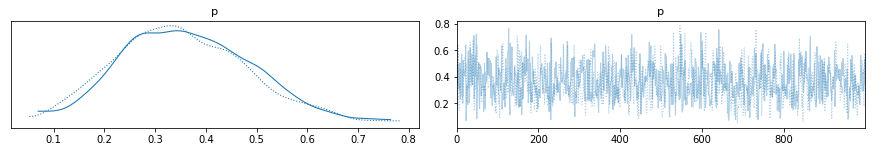

In [ ]:
# Potserior probability distribution after observing 3 success out of 10 trials
pm.traceplot(trace)

**Solving the above questions using derived expression for computing marginal probability** of observing y=1 i.e predictive and posterior probability.

For Bernoulli trial with Beta prior, the marginal probability of y is

$f(y) = \int_0^1 f(y|\theta) f(\theta) d\theta $

where $f(\theta)$ is the prior distribution $Beta(a,b)$ for parameter p for Bernouuli trial Bernoulli(p) in case of computing marginal probability to compute prior predictive probability.

The derived expression for this marginal probability is obtained as a function of y, which gives the probability of y=1 , i.e probability of outcome = 1 in the Bernoulli trial -

$f(y) = \frac{\Gamma(a+b) \Gamma(a+y) \Gamma(b-y+1)}{\Gamma(a) \Gamma(b) \Gamma(a+b+1)}$

In case of computing marginal probability for posterior predictive probability, this $f(\theta)$ is replaced by $f(\theta|y)$ posterior brobability distribution of p which is also a $ Beta(a',b') $  distribution.

Since Beta is a conjute prior for Bernoulli distribution, this expression for computing marginal distribution is the same for prior and posterior predictive distribution since $f(\theta)$ and $f(\theta|y)$ belongs to the same family of distribution. 

While obtaining predictive distributions, we use the respective parameters of Beta priors and posterior distributions in the expression.

**Using the above expression to obtain prior predictive distribution with Beta(2,2)**


In [ ]:
def computeMarginalY(a,b,y):
  return (gamma(a+b) * gamma(a+y) * gamma(b-y+1)) / (gamma(a) * gamma(b) * gamma(a+b+1))

In [ ]:
a = 2
b = 2
y = 1

computeMarginalY(a,b,y)

0.5

After observing 3 successes for 10 trials, the posterior probability distribution becomes $Beta(a+3, 10-b+1)$ i.e $Beta(5,9) $
**Using the above expression to obtain posterior predictive probability for 11th Bernoulli outcome with Beta(5,9)**

In [ ]:
num_trials = 10
num_success = 3

computeMarginalY(a + num_success, n - b + 1, y)

0.35714285714285715

### week 4

#### Lesson 9

Suppose that we wish to use a prior with the same mean (1/20), but with effective sample size of one arrival. Then the prior for $\lambda $ is Gamma(1, 20).

In addition to the original $Y_1=12$, we observe the waiting times for four additional busses: $Y_2=15, Y_3=8, Y_4=13.5, Y_5=25.$

Recall that with multiple (independent) observations, the posterior for $\lambda$ is $ Gamma(\alpha, \beta) $ where $\alpha $ = a + n and $\beta $ = b + $ \sum y_i.$

What is the posterior mean for $\lambda?$ Round your answer to two decimal places.


In [ ]:
# Parameters for prior distribution
alpha = 1           # since effective sample size i.e a is 1
beta = 20
# After 5 observations, total waiting time i.e sum_y
n = 5
sum_y = 12 + 15 + 8 + 13.5 + 25

In [ ]:
alpha + n, beta + sum_y

(6, 93.5)

In [ ]:
# Expectation of posterior distribution with Gamma(alpha + n, beta + sum_y)
stats.gamma(a=alpha + n, scale=1/(beta + sum_y)).expect()

0.06417112299465241

### find the posterior probability that $\lambda $ < 1/10

In [ ]:
stats.gamma.cdf(a=alpha + n, scale=1/(beta + sum_y), x=1/10)

0.9039698786381929

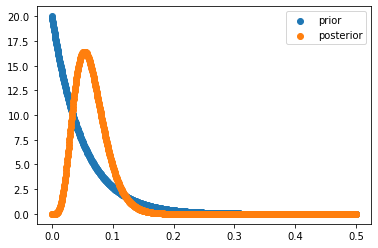

In [ ]:
x = np.linspace(0,0.5, 1000)
plt.scatter(x, stats.gamma(a=alpha , scale=1/(beta)).pdf(x), label="prior")
plt.scatter(x, stats.gamma(a=alpha + n, scale=1/(beta + sum_y)).pdf(x), label='posterior')
plt.legend()
plt.show()

#### 7. The posterior distribution is $\lambda \mid \mathbf{y} \sim \text{Gamma}(\alpha, \beta) $ . What is the value of $ \alpha? $

In [ ]:
 sum_y = 16 + 8 + 114 + 60 + 4 + 23 + 30 + 105

alpha = 1                 # since effective sample size i.e a is 1
beta = 30 

n = 8
a = alpha + n
b = beta + sum_y
print(a, b)

9 390


In [ ]:
stats.gamma(a=a, scale=1/(b)).interval(alpha=0.95)

(0.010552238711226496, 0.04041843389793157)

In [ ]:
def posterior_predictive_density(y):
  n = 8
  a = alpha + n
  b = beta + sum_y
  return (pow(beta, alpha) * alpha) / pow(beta + y, alpha + 1)


In [ ]:
vf = np.vectorize(posterior_predictive_density)

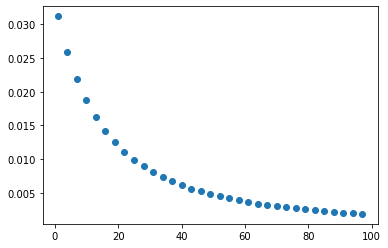

In [ ]:
y = np.arange(1,100, step=3)
plt.scatter(y, vf(y))
plt.show()

### Week 4

Lession 10

In [ ]:
# Question 2
data_var = 0.25                 # data variance
w = 1                           # Effective sample size : data variance / prior variance

prior_var = data_var / w
prior_var

0.25

In [ ]:
# Question 3
n = 5                                          # No. of observations
m = 100                                        # prior mean
obs = np.array([94.6, 95.4, 96.2, 94.9, 95.9]) 
x_bar = obs.mean()                             # data mean


posterior_mean = ((n/(n + (w))) * x_bar) +  ((w / (n+w)) * m)
posterior_mean

96.16666666666669

In [ ]:
posterior_variance = 1 / ((n/data_var) + (1/prior_var))
posterior_variance

0.041666666666666664

Fnd the upper end of a 95% equal-tailed credible interval for $\theta.$

In [ ]:
stats.norm(loc=posterior_mean, scale=np.sqrt(posterior_variance)).interval(alpha=0.95)

(95.76659069363707, 96.5667426396963)

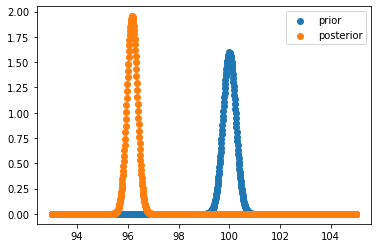

In [ ]:
x = np.linspace(93,105, 1000)
plt.scatter(x, stats.norm(loc=m, scale=prior_var).pdf(x), label="prior")
plt.scatter(x, stats.norm(loc=posterior_mean, scale=np.sqrt(posterior_variance)).pdf(x), label='posterior')
plt.legend()
plt.show()

In [ ]:
stats.norm(loc=posterior_mean, scale=np.sqrt(posterior_variance)).cdf(x=100)

1.0

In [ ]:
# P(theta = 100)
stats.norm(loc=posterior_mean, scale=np.sqrt(posterior_variance)).pdf(x=100)

5.133600214199964e-77

Question 6 - What is the posterior predictive distribution of a single future observation Y?

Posterior predictive distribution for x ~ $ N(m_0, s0^2 + \sigma_0^2)$ 
with $m_0$ replaced by posterior mean and $s_0$ replaced by posterior variance.

In [ ]:
posterior_predictive_variance = data_var + posterior_variance
posterior_predictive_variance

0.2916666666666667

In [ ]:
## Question 8
n = 27
a = 3
b = 200
m = 500                           # prior mean
gamma_samples = stats.gamma(a=a, scale=1/b).rvs(300)
prior_variance = (1/gamma_samples).mean()
prior_variance

97.69460002659414

Question 9

1. Drawing from posterior distribution of $f(sigma ^2|X)$ ~ $\Gamma ^ {-1}(a', b')$
2. Drawing from posterior distribution of $f(\mu|\sigma ^2, X) $

In [ ]:
a_ = 16.5
b_ = 6022.9
w = 0.1
w_plus_n = 27.1
m_ = 609.7
posterior_var_draws = 1 / stats.gamma(a=a_, scale=1/b_).rvs(1000)
posterior_var_draws.shape

(1000,)

In [ ]:
# To obtain 1000 draws from posterior distribution of mu for each value of std
# in the draws of posterior variance obtained earlier

posterior_mean_draws = []
for var in posterior_var_draws:
  draws = stats.norm(loc=m_, scale=np.sqrt(var/w_plus_n)).rvs(1000)
  posterior_mean_draws += draws.tolist()

In [ ]:
len(posterior_mean_draws)

1000000

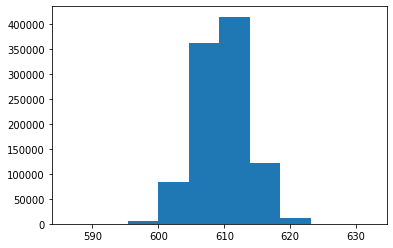

In [ ]:
plt.hist(posterior_mean_draws)
plt.show()

In [ ]:
# 95% equal tailed interval
np.percentile(posterior_mean_draws, q=2.5), np.percentile(posterior_mean_draws, q=97.5)

(602.1779248804297, 617.2130532323428)

In [ ]:
# Verify if the samples drawn for mean match with given value 609.3
np.mean(posterior_mean_draws)

609.7037238695376

For restaurant A

In [ ]:
m

500

In [ ]:
n = 30
sample_var = 401.8
sample_mean = 622.8

m_ = ((n * sample_mean) + (w*m))/(n+w)            # posterior mean
w_plus_n = n + w
a_ = a + n/2
b_ = b + (((n-1)/2) * sample_var) + ((n*w)/(2*w_plus_n))*((sample_mean - m)**2)
a_, b_, w_plus_n, m_

(18.0, 6777.587043189369, 30.1, 622.3920265780731)

In [ ]:
# Draws from posterior variance
posterior_var_a = 1/stats.gamma(a=a_, scale=1/b_).rvs(1000)

In [ ]:
# Draws from posterior mean using samples drawn from posterior variance
posterior_mean_draws_a = []
for var in posterior_var_a:
  draws = stats.norm(loc=m_, scale=np.sqrt(var/w_plus_n)).rvs(1000)
  posterior_mean_draws_a += draws.tolist()

In [ ]:
np.mean(posterior_mean_draws_a)

622.3900588660837

In [ ]:
np.mean(posterior_mean_draws_a > posterior_mean_draws)

1.0

### Lesson 4 
Question 2

In [ ]:
heads = 4
n = 5
a = b = 0
alpha_ = 0 + heads
beta = b + n - heads



Question 3


In [ ]:
data_var = 0.25
prior_mean = 1

data = np.array([94.6, 95.4, 96.2, 94.9, 95.9])
data_mean = data.mean()

posterior_var = data_var/len(data)
data_mean, posterior_var

(95.4, 0.05)